In [80]:
import spectral_analysis as sa
import numpy as np
import pandas as pd

import importlib
import sys
module = sys.modules["spectral_analysis"]
importlib.reload(module)

<module 'spectral_analysis' from 'd:\\Users\\rewas\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\spectral_analysis.py'>

# 80 delayu, 40 chirpu

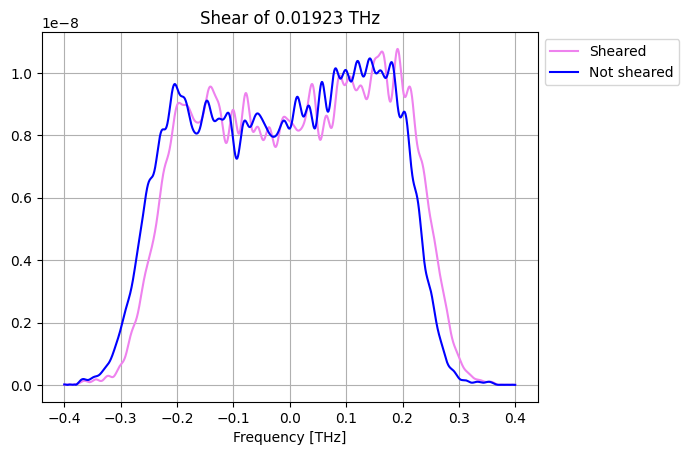

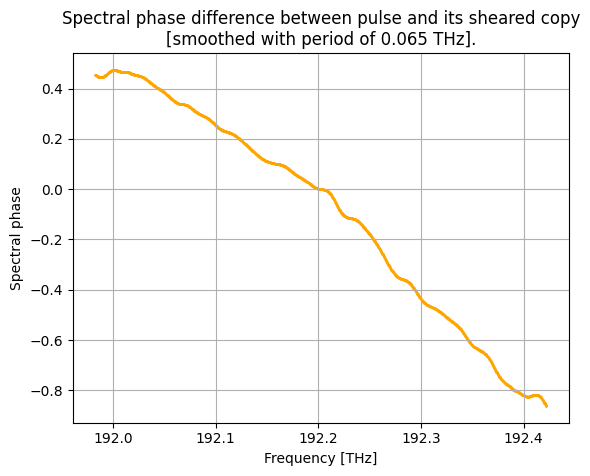

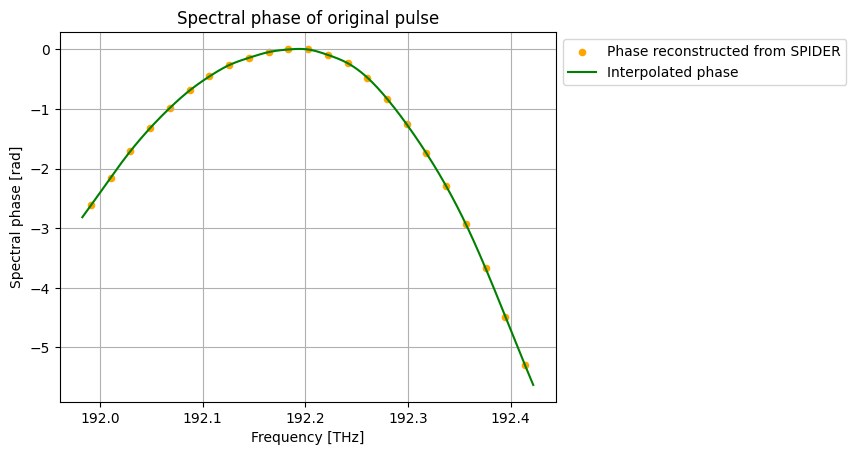

In [81]:
phase_ex_com_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        find_shear = "center of mass",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

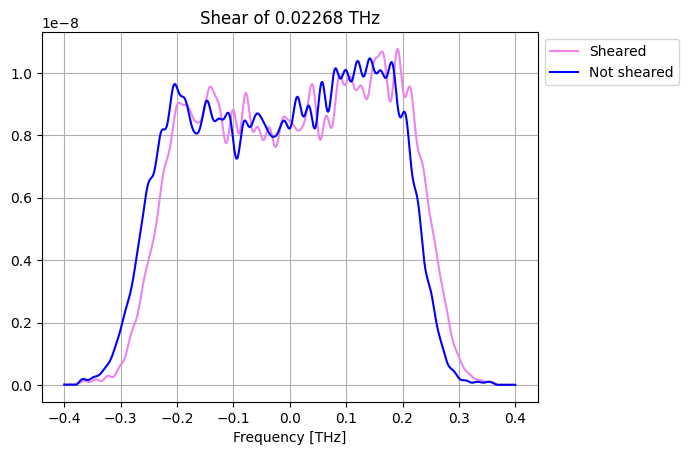

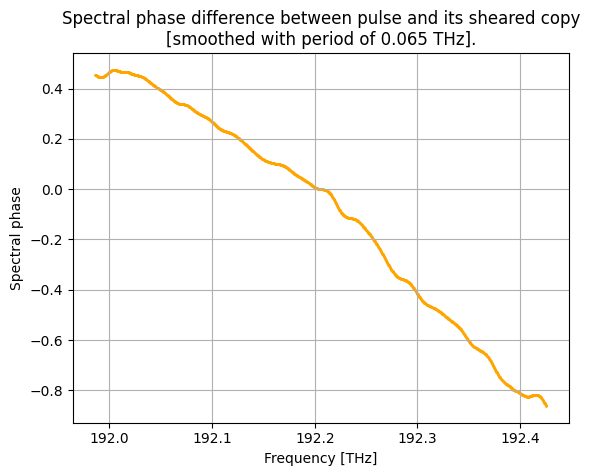

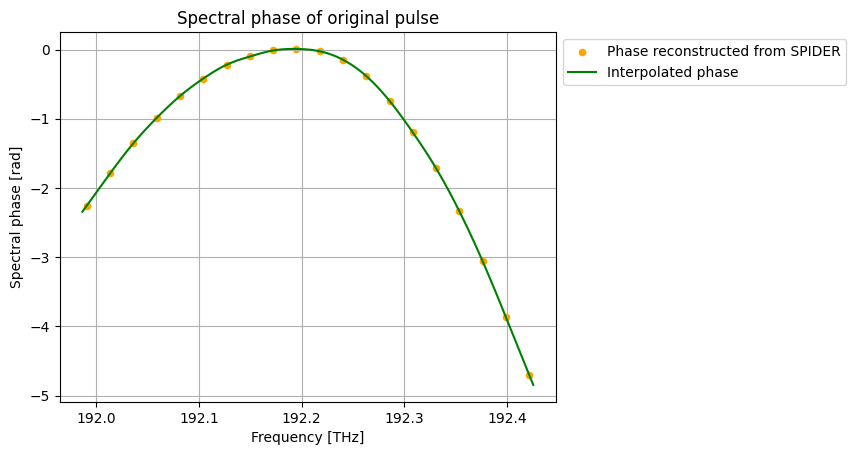

In [82]:
phase_ex_ls_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

In [83]:
sheared = sa.load_csv("data/80del40chirp_sheared.csv")
not_sheared = sa.load_csv("data/80del40chirp_not_sheared.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()
sheared.constant_spacing()
not_sheared.constant_spacing()

shear40ls = sa.find_shift(sheared, not_sheared)
shear40com = sheared.quantile(0.5) - not_sheared.quantile(0.5)

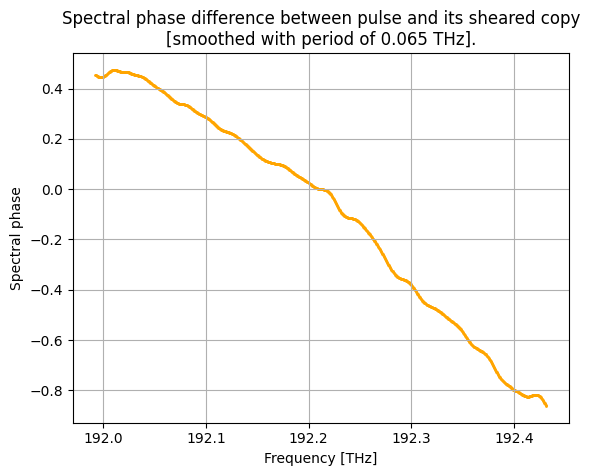

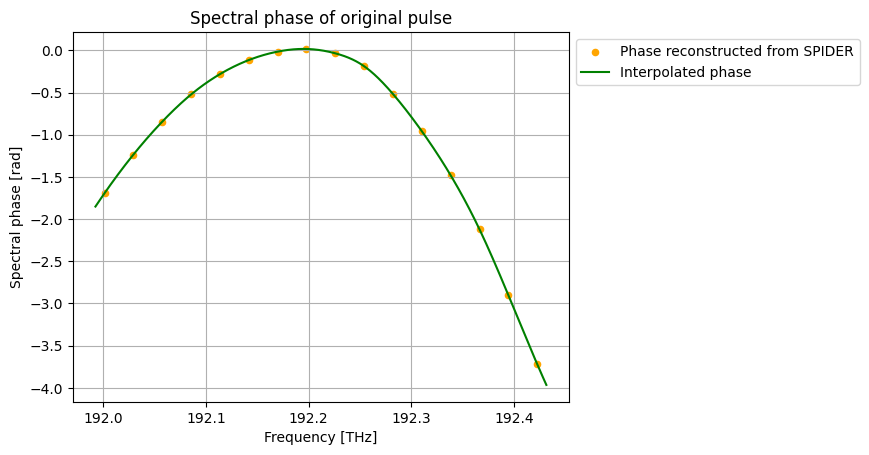

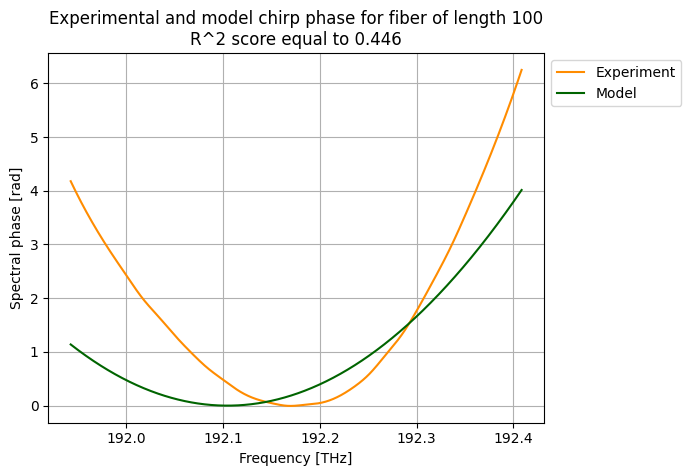

0.4464518236299441

In [106]:
phase_meas_com_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        shear = shear40com,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

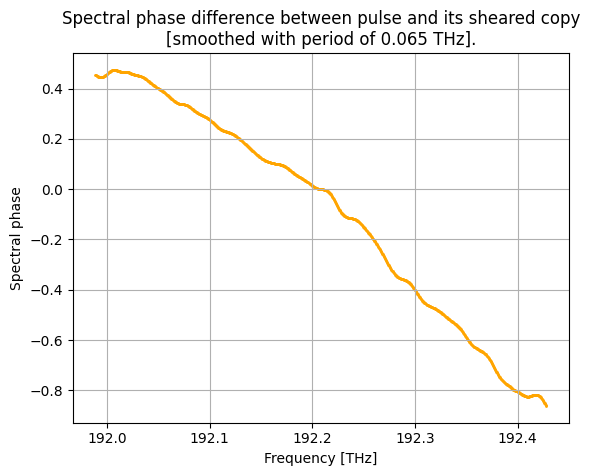

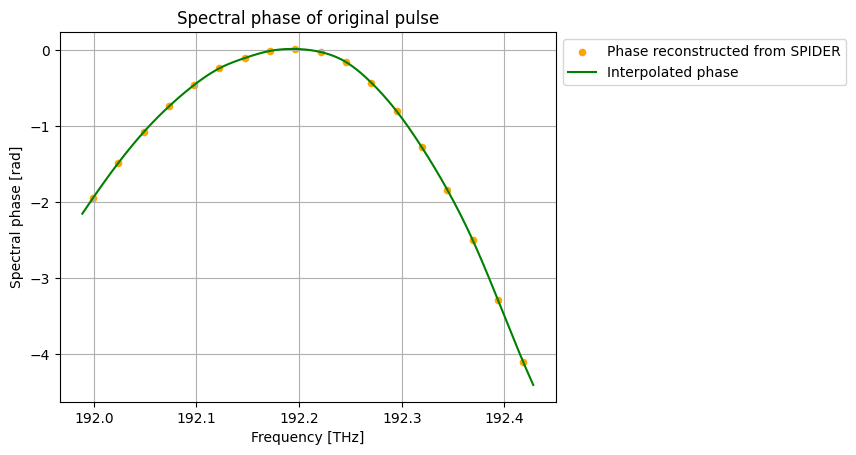

In [85]:
phase_meas_ls_40 = sa.spider("data/80del40chirp_p_spectrum.csv",
        "data/80del40chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        shear = shear40ls,
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

In [86]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

omega = np.linspace(191.98, 192.43, 1000)
omega_mean = 192.19
fiber_length = 122
phase = -phase(omega, omega_mean, fiber_length)

sim_phase_40 = sa.spectrum(omega, phase, x_type = "freq", y_type = "phase")

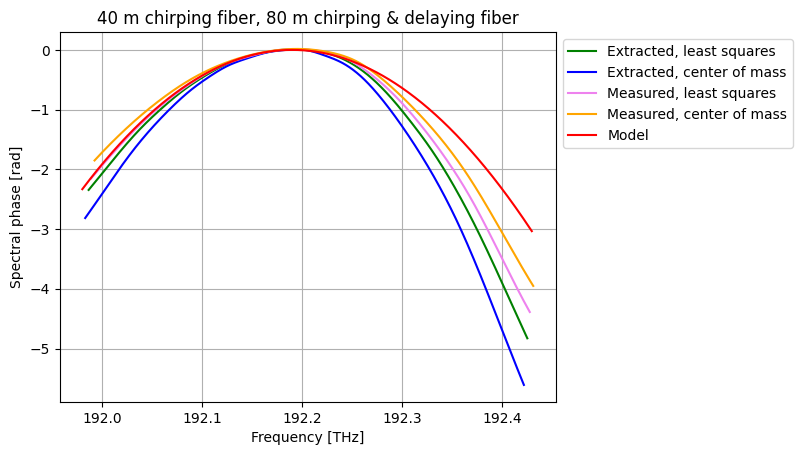

In [87]:
sa.compare_plots([phase_ex_ls_40, phase_ex_com_40, phase_meas_ls_40, phase_meas_com_40, sim_phase_40],
legend = ["Extracted, least squares", "Extracted, center of mass", "Measured, least squares", "Measured, center of mass", "Model"],
colors = ["green", "blue", "violet", "orange", "red"],
title = "40 m chirping fiber, 80 m chirping & delaying fiber")

# 80 delayu 20 chirpu

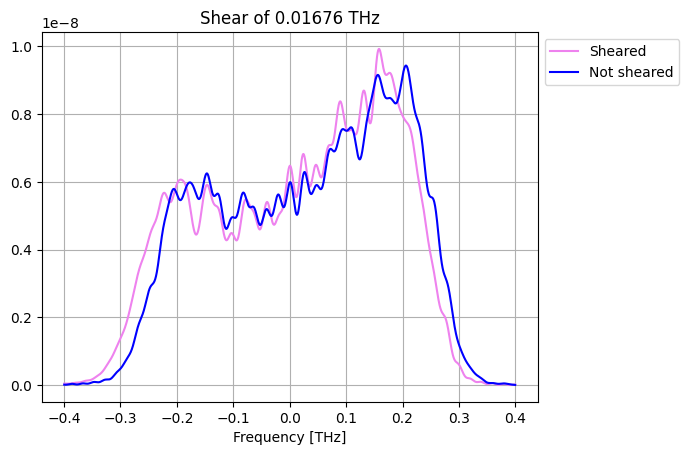

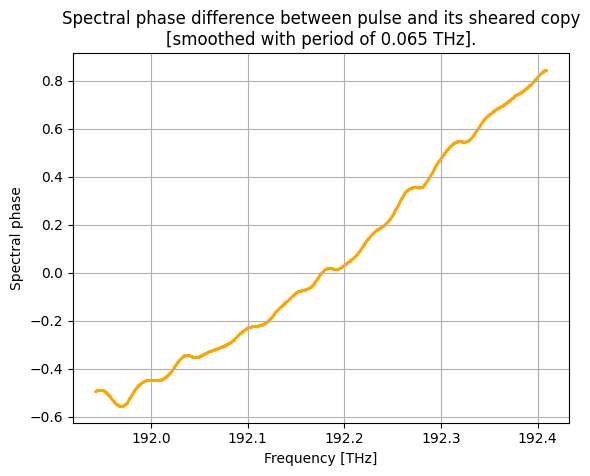

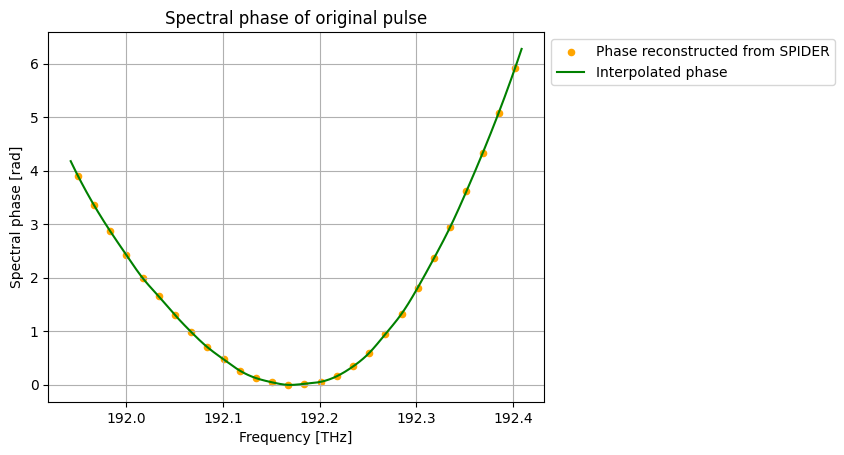

In [88]:
phase_ex_com_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        find_shear = "center of mass",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

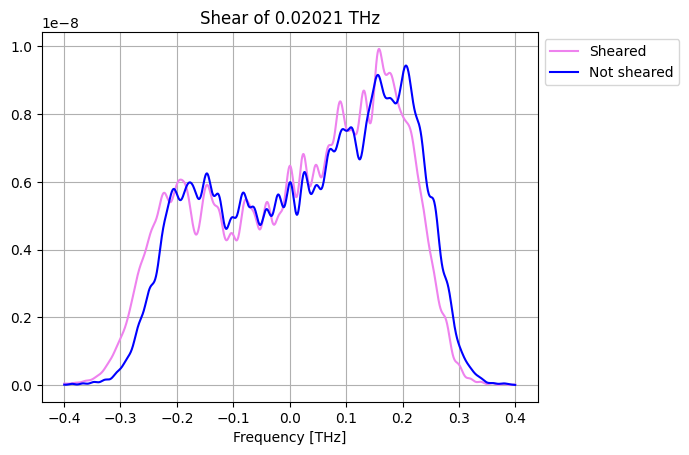

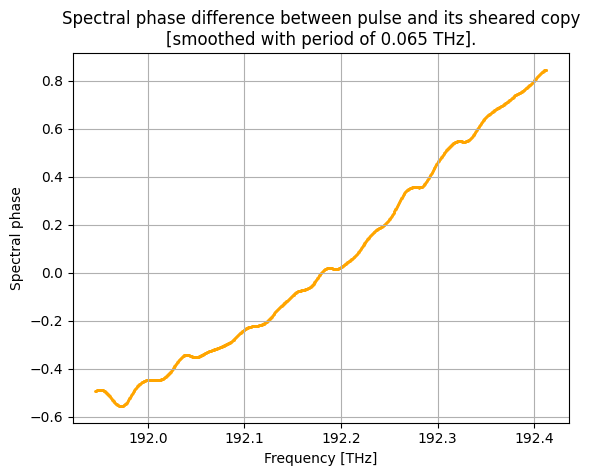

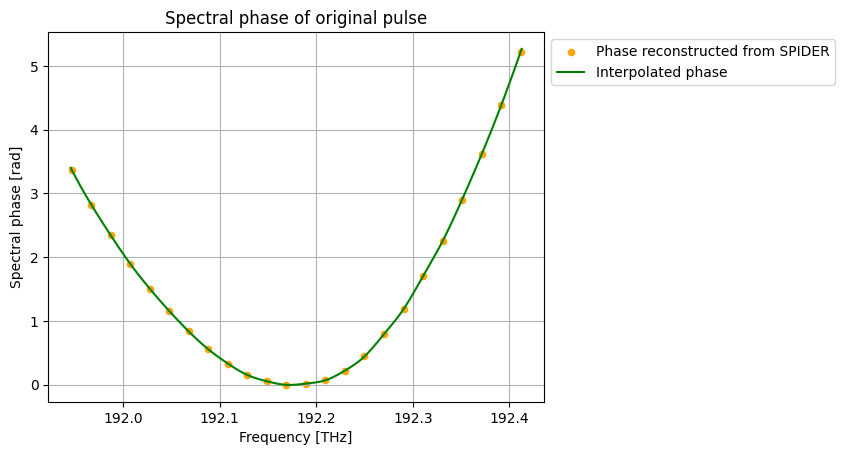

In [89]:
phase_ex_ls_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

In [90]:
sheared = sa.load_csv("data/80del20chirp_sheared.csv")
not_sheared = sa.load_csv("data/80del20chirp_not_sheared.csv")

sheared.wl_to_freq()
not_sheared.wl_to_freq()
sheared.constant_spacing()
not_sheared.constant_spacing()

shear20ls = np.abs(sa.find_shift(sheared, not_sheared))
shear20com = np.abs(sheared.quantile(0.5) - not_sheared.quantile(0.5))

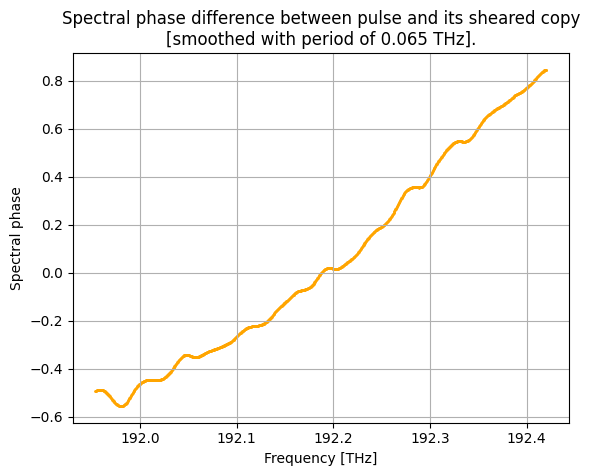

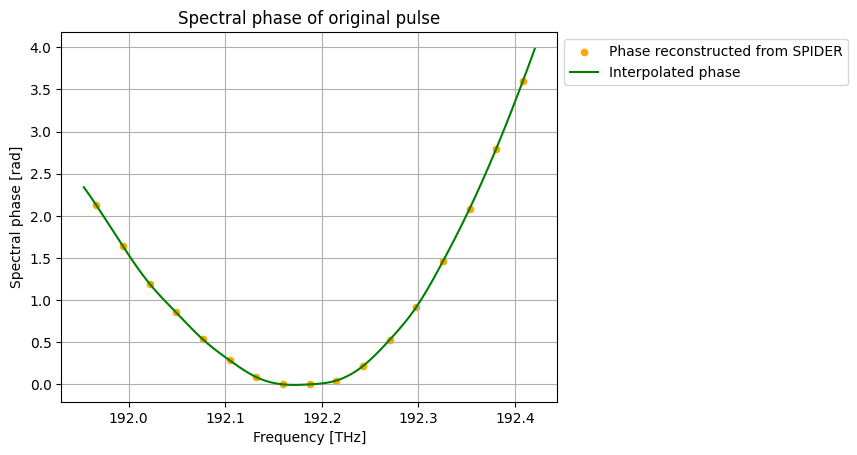

In [91]:
phase_meas_ls_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        shear = shear20ls,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

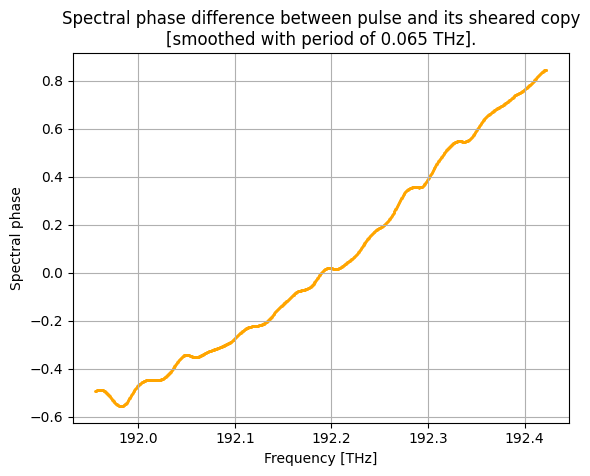

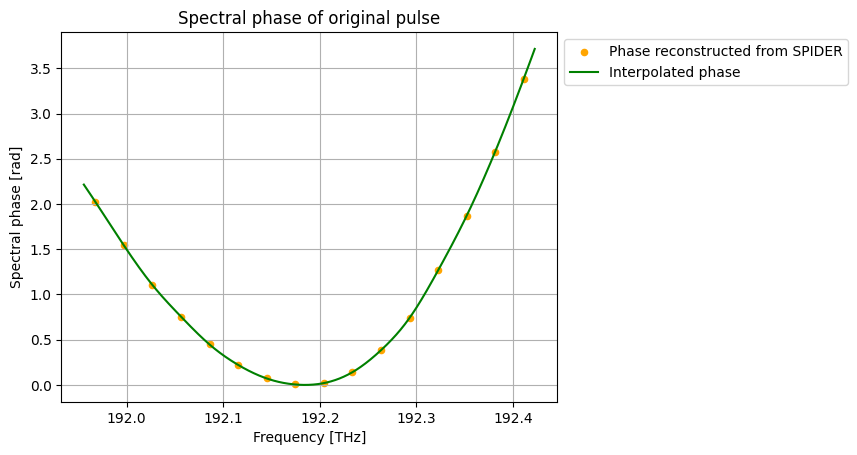

In [92]:
phase_meas_com_20 = sa.spider("data/80del20chirp_p_spectrum.csv",
        "data/80del20chirp_t_spectrum.csv",
        plot_steps = False,
        plot_shear = True,
        shear = shear20com,
        find_shear = "least squares",
        smoothing_period = 0.065,
        what_to_return = "phase"
        )[1]

In [93]:
def phase(f, f_mean, fiber_length):
    c = 299792458 
    l_0 = c/(f_mean*1e3)
    D_l = 17
    omega = f*2*np.pi
    omega_mean = f_mean*2*np.pi
    return l_0**2*fiber_length*D_l/(4*np.pi*c)*(omega-omega_mean)**2

omega = np.linspace(191.98, 192.43, 1000)
omega_mean = 192.19
fiber_length = 102
phase = phase(omega, omega_mean, fiber_length)

sim_phase_20 = sa.spectrum(omega, phase, x_type = "freq", y_type = "phase")

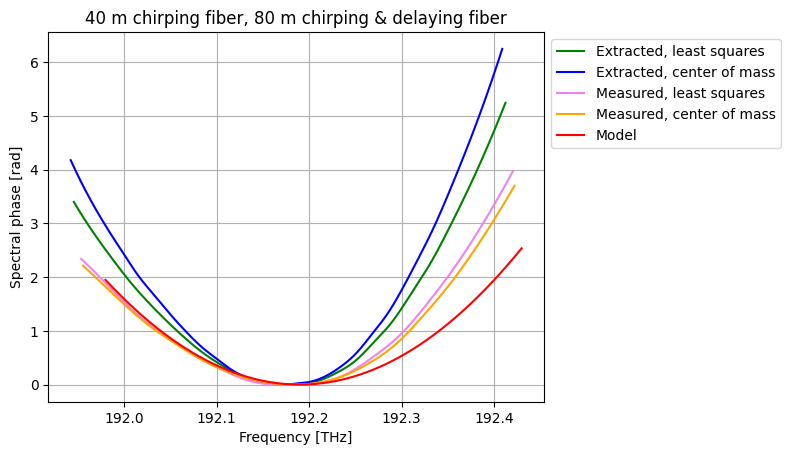

In [94]:
sa.compare_plots([phase_ex_ls_20, phase_ex_com_20, phase_meas_ls_20, phase_meas_com_20, sim_phase_20],
legend = ["Extracted, least squares", "Extracted, center of mass", "Measured, least squares", "Measured, center of mass", "Model"],
colors = ["green", "blue", "violet", "orange", "red"],
title = "40 m chirping fiber, 80 m chirping & delaying fiber")

# 40 vs 20 m

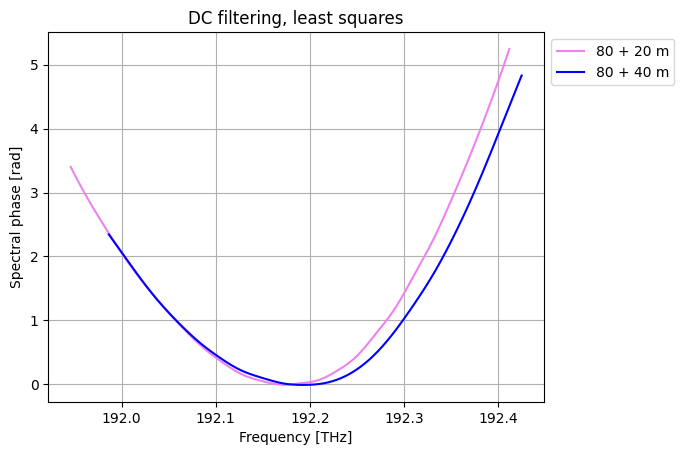

In [95]:
phase_ex_ls_40. Y *= -1
sa.compare_plots([phase_ex_ls_20, phase_ex_ls_40], title = "DC filtering, least squares", 
                 legend = ["80 + 20 m", "80 + 40 m"])

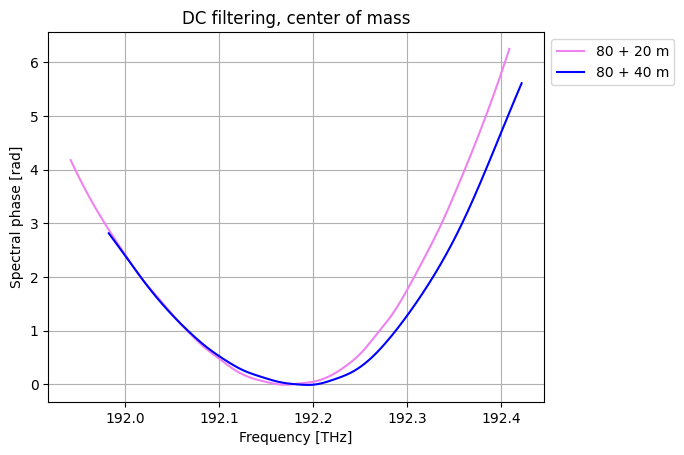

In [96]:
phase_ex_com_40. Y *= -1
sa.compare_plots([phase_ex_com_20, phase_ex_com_40], title = "DC filtering, center of mass", 
                 legend = ["80 + 20 m", "80 + 40 m"])

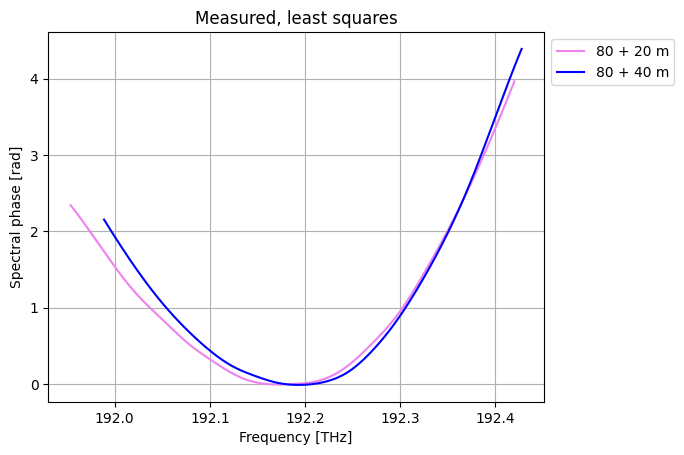

In [97]:
phase_meas_ls_40. Y *= -1
sa.compare_plots([phase_meas_ls_20, phase_meas_ls_40], title = "Measured, least squares", 
                 legend = ["80 + 20 m", "80 + 40 m"])

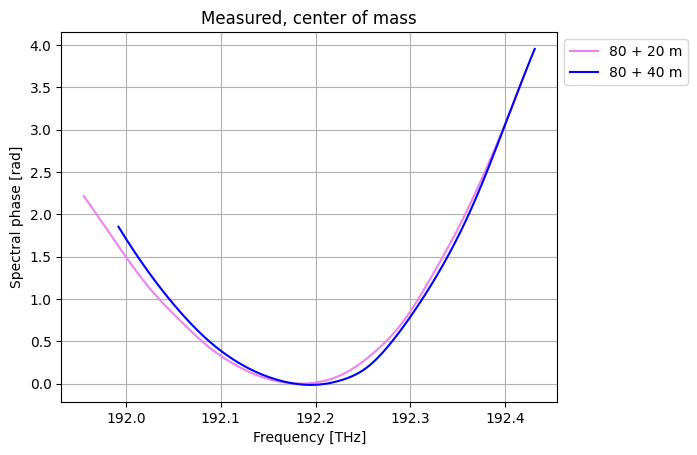

In [98]:
phase_meas_com_40. Y *= -1
sa.compare_plots([phase_meas_com_20, phase_meas_com_40], title = "Measured, center of mass", 
                 legend = ["80 + 20 m", "80 + 40 m"])